# Capstone Two: Exploratory Data Analysis

The goal of this EDA is to review the clean FEMA claims dataset to develop an understanding of variable profiles and explore possible relationships

In [54]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

In [55]:
# Import data as csv from data wrangling step
claims = pd.read_csv('claimsdata_clean.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,13,16,18,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Numerical Variables

A. Get summary statistics of numerical variables

In [3]:
claims.describe().T

,count,mean,std,min,25%,50%,75%,max
agriculturestructureindicator,2418007.0,1.936314,2.443764e-01,0.00,2.0,2.00,2.000,2.000000e+00
basefloodelevation,2418007.0,20.258911,1.349724e+02,-6002.00,8.0,8.00,8.000,9.998000e+03
basementenclosurecrawlspacetype,2418007.0,1.465796,9.299563e-01,0.00,1.0,1.00,1.000,5.000000e+00
condominiumindicator,2418007.0,1.033314,4.439224e-01,0.00,1.0,1.00,1.000,5.000000e+00
policycount,2418007.0,1.246979,6.210478e+00,1.00,1.0,1.00,1.000,1.090000e+03
crsdiscount,2418007.0,9.300549,1.247776e+00,0.00,9.0,10.00,10.000,1.000000e+01
elevatedbuildingindicator,2418007.0,0.873371,3.954458e-01,0.00,1.0,1.00,1.000,2.000000e+00
elevationcertificateindicator,2418007.0,0.481921,9.604869e-01,0.00,0.0,0.00,1.000,9.000000e+00
elevationdifference,2418007.0,750.270445,4.321423e+02,-1987.00,999.0,999.00,999.000,9.998000e+03
houseworship,2418007.0,1.903329,3.020927e-01,0.00,2.0,2.00,2.000,2.000000e+00


B. Plots historgrams of numerical variables to see distribution

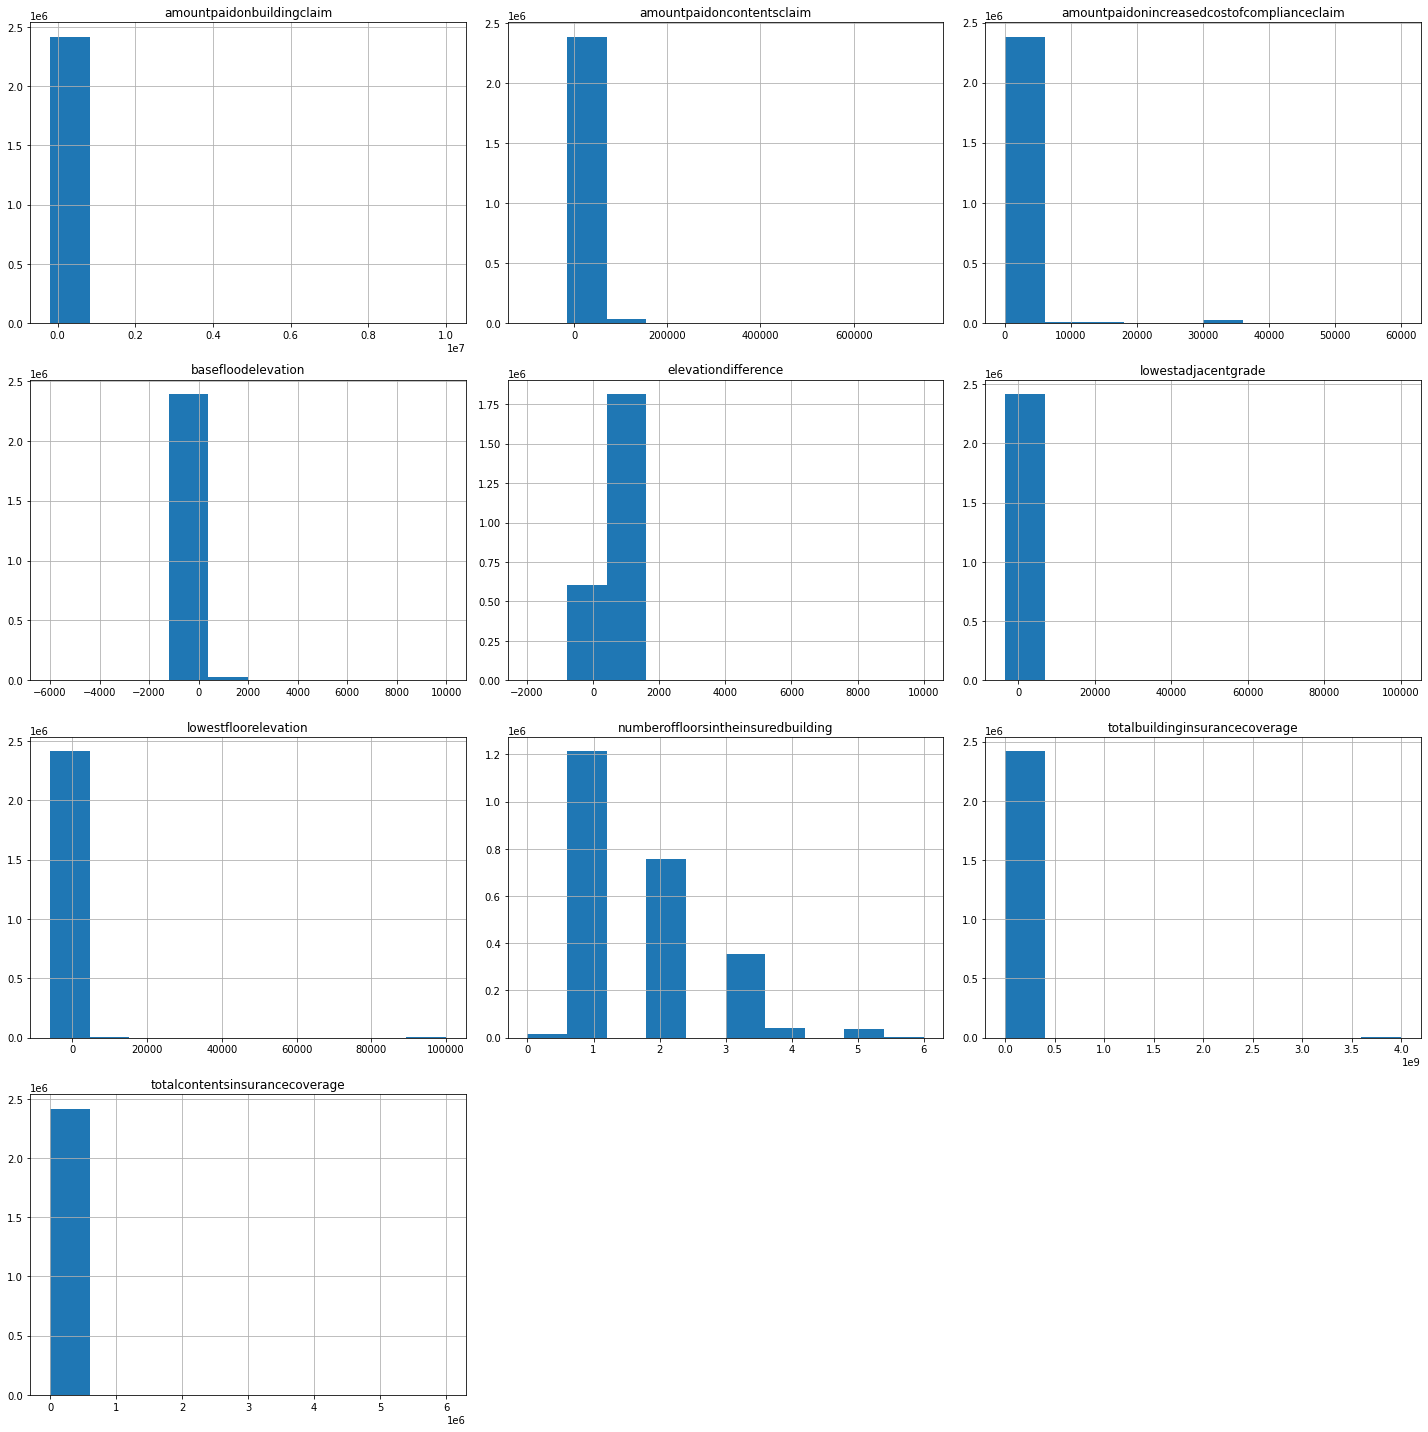

In [5]:
# Plot historgams of numerical variables

num_vars = ['basefloodelevation', 
       'elevationdifference', 
       'lowestadjacentgrade', 'lowestfloorelevation',
       'numberoffloorsintheinsuredbuilding',
       'amountpaidonbuildingclaim',
       'amountpaidoncontentsclaim',
       'amountpaidonincreasedcostofcomplianceclaim',
       'totalbuildinginsurancecoverage', 'totalcontentsinsurancecoverage']

_ = claims.hist(num_vars, figsize=(20,20))
_ = plt.tight_layout()

plt.show()

Zoom in on areas of interest on response variable "amountpaidonbuildingclaim" and a few others

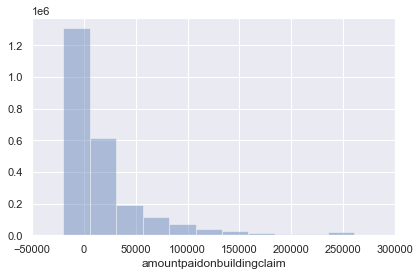

In [56]:
# Amount paid on building claim
_ = sns.distplot(claims['amountpaidonbuildingclaim'], bins=400, kde=False)
_ = plt.xlim(-50000,300000)
_ = plt.tight_layout()

plt.show()

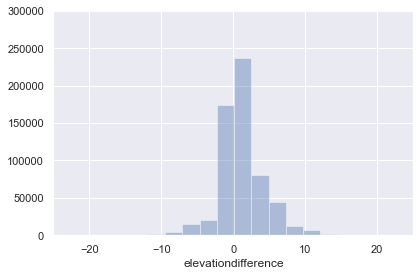

In [64]:
# Elevation difference
_ = sns.distplot(claims['elevationdifference'], bins=5000, kde=False)
_ = plt.xlim(-25,25)
_ = plt.ylim(0, 300000)
_ = plt.tight_layout()

plt.show()

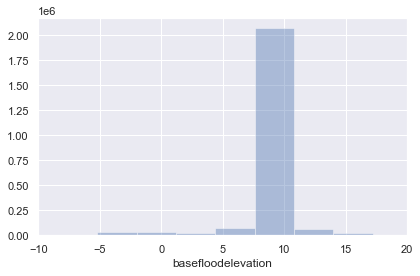

In [65]:
# Base flood elevation
_ = sns.distplot(claims['basefloodelevation'], bins=5000, kde=False)
_ = plt.xlim(-10,20)
_ = plt.tight_layout()

plt.show()

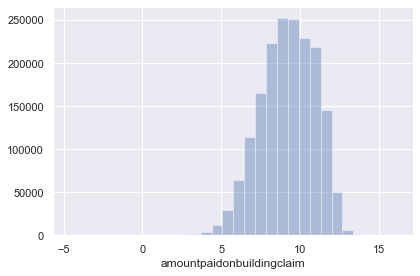

In [67]:
# Attempt log transformation of amount paid on building claim to see effect on skewness
# NOTE: this only includes observations greater than 0
_ = sns.distplot(np.log(claims['amountpaidonbuildingclaim'][claims['amountpaidonbuildingclaim']>0]), bins=30, kde=False)
_ = plt.tight_layout()

plt.show()

C. Explore boxplots of variables: amountpaidonbuildingclaim and elevationdifference (zoomed in to view observations clustered around 0)

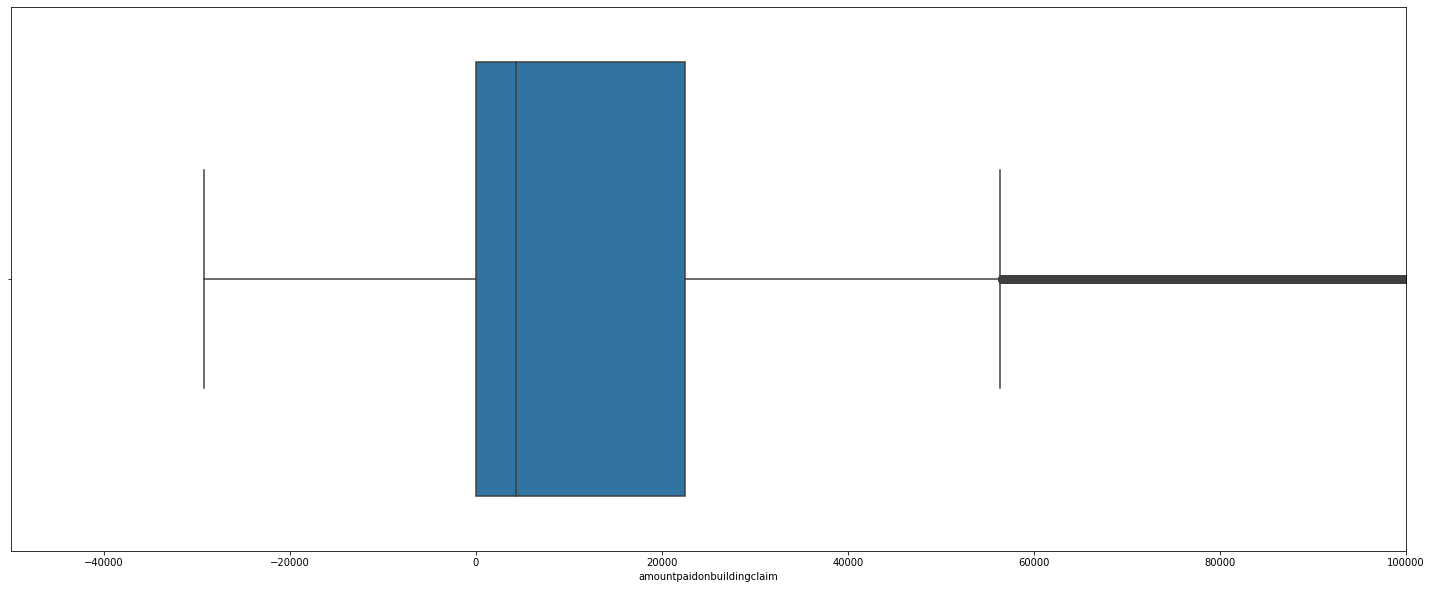

In [39]:
# Boxplot of amount paid on building claim
_ = plt.figure(figsize = (25, 10))
_ = sns.boxplot(x = 'amountpaidonbuildingclaim', data = claims)
_ = plt.xlim(-50000,100000)

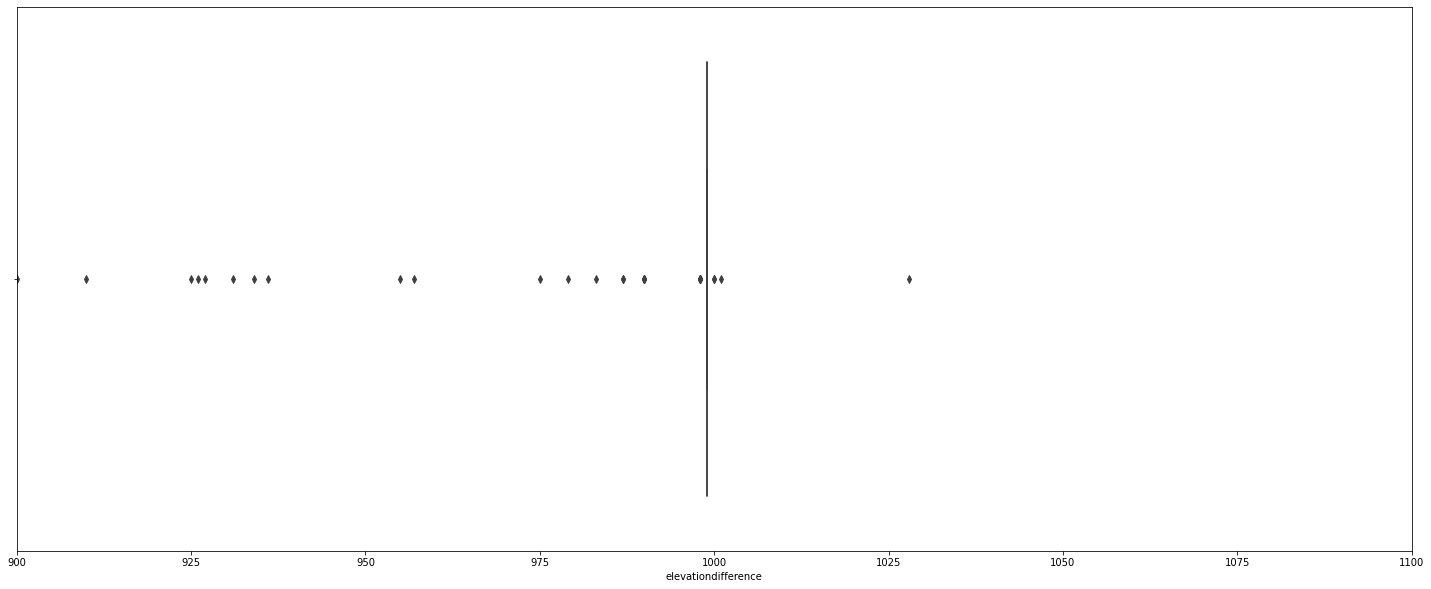

In [45]:
# boxplot of elevation difference
_ = plt.figure(figsize = (25, 10))
_ = sns.boxplot(x = 'elevationdifference', data = claims)
_ = plt.xlim(900,1100)

Note that the boxplot of elevation difference is greatly impacted by the extreme values and considers the observations around 0 to be outliers

### Categorical Variables

A. Plot counts of several categorical variables

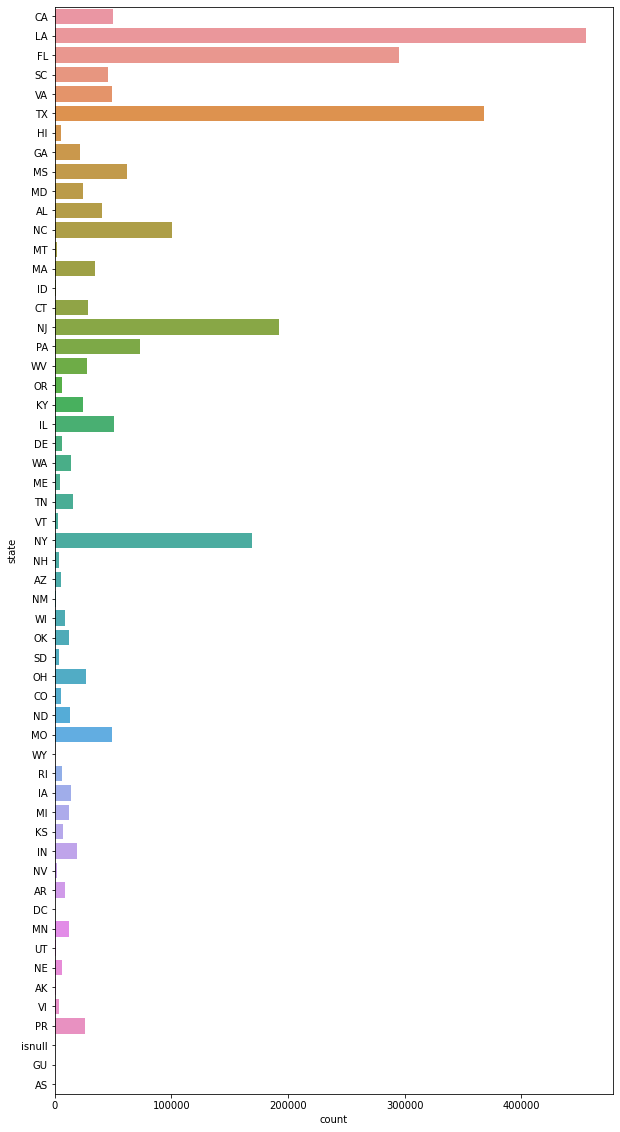

In [44]:
# View counts of claims by state
_ = plt.figure(figsize=(10, 20))
_ = sns.countplot(data=claims, y = 'state', orient='v')

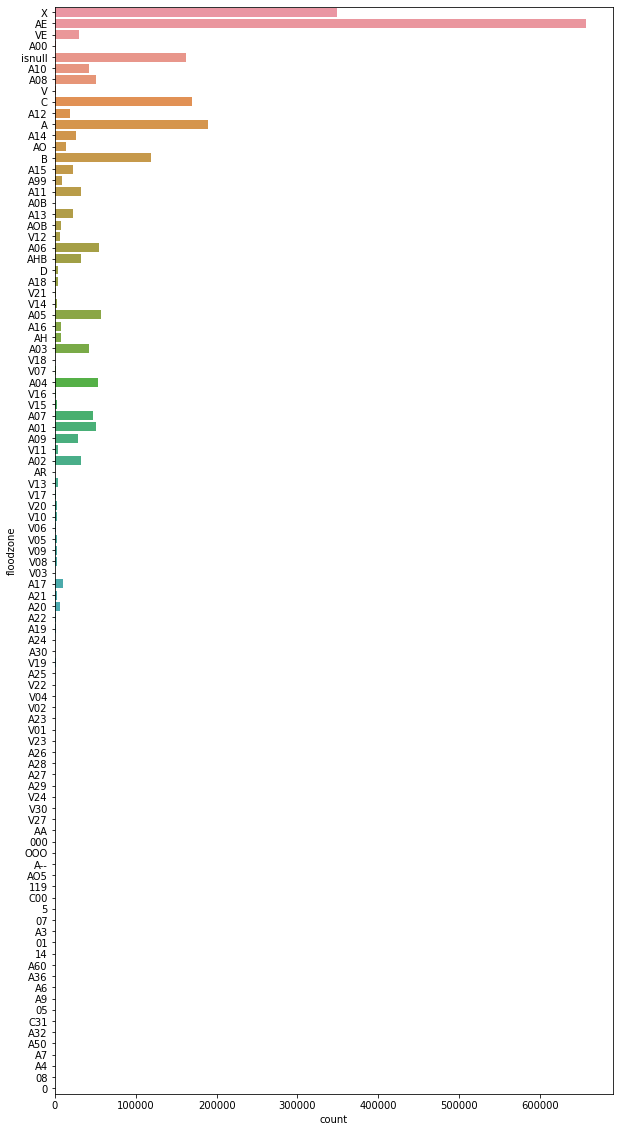

In [45]:
# View counts of claims by flood zone
_ = plt.figure(figsize=(10, 20))
_ = sns.countplot(data=claims, y = 'floodzone', orient='v')

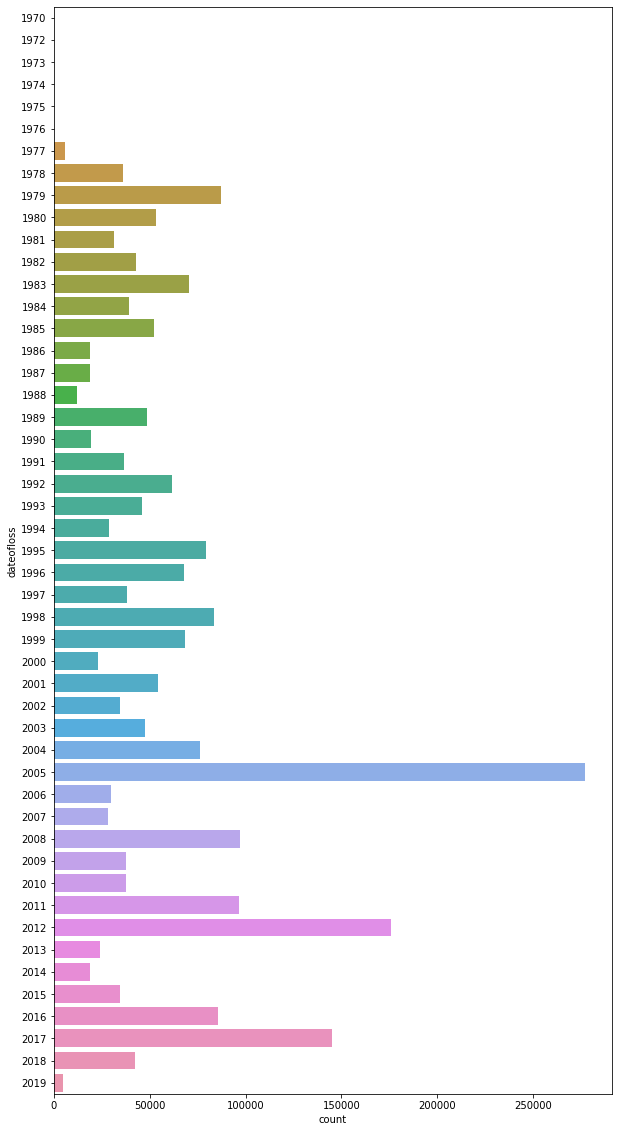

In [54]:
# View counts of claims by year of loss
years = pd.DataFrame(pd.DatetimeIndex(claims['dateofloss']).year)

_ = plt.figure(figsize=(10, 20))
_ = sns.countplot(data=years, y ='dateofloss', orient='v')

### Relationships

A. Explore correlation coefficients of numerical variables

In [66]:
nona_vars = claims[['agriculturestructureindicator', 'asofdate', 'basefloodelevation',
       'basementenclosurecrawlspacetype', 'reportedcity',
       'condominiumindicator', 'policycount', 'countycode', 'crsdiscount',
       'dateofloss', 'elevatedbuildingindicator',
       'elevationcertificateindicator', 'elevationdifference', 'censustract',
       'floodzone', 'houseworship', 'latitude', 'locationofcontents',
       'longitude', 'lowestadjacentgrade', 'lowestfloorelevation',
       'numberoffloorsintheinsuredbuilding', 'nonprofitindicator',
       'obstructiontype', 'occupancytype', 'originalconstructiondate',
       'originalnbdate', 'amountpaidonbuildingclaim',
       'amountpaidoncontentsclaim',
       'amountpaidonincreasedcostofcomplianceclaim',
       'postfirmconstructionindicator', 'ratemethod',
       'smallbusinessindicatorbuilding', 'state',
       'totalbuildinginsurancecoverage', 'totalcontentsinsurancecoverage',
       'yearofloss', 'reportedzip', 'primaryresidence']]
nona_vars.corr()

,agriculturestructureindicator,basefloodelevation,basementenclosurecrawlspacetype,condominiumindicator,policycount,crsdiscount,elevatedbuildingindicator,elevationcertificateindicator,elevationdifference,houseworship,...,amountpaidonbuildingclaim,amountpaidoncontentsclaim,amountpaidonincreasedcostofcomplianceclaim,postfirmconstructionindicator,ratemethod,smallbusinessindicatorbuilding,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss,primaryresidence
agriculturestructureindicator,1.000000,-0.021102,0.012851,-0.026594,-0.009711,0.152575,0.082643,-0.007851,0.077516,0.772894,...,-0.115360,-0.070028,0.021388,0.140021,-0.174577,0.752735,-0.012626,-0.157527,-0.366007,0.182280
basefloodelevation,-0.021102,1.000000,0.022065,0.010056,0.000523,-0.005448,-0.044848,0.070992,-0.141004,-0.027578,...,-0.000355,-0.004432,-0.004861,-0.075992,-0.006861,-0.030280,0.001399,0.004142,0.044569,-0.035240
basementenclosurecrawlspacetype,0.012851,0.022065,1.000000,-0.129564,0.003754,0.128385,0.038153,-0.018675,0.111852,0.018673,...,-0.065633,-0.082751,0.000212,0.201095,-0.053209,0.026350,0.001739,-0.073392,-0.068703,0.012740
condominiumindicator,-0.026594,0.010056,-0.129564,1.000000,0.257533,-0.108333,-0.238617,0.060845,-0.129620,-0.029096,...,0.077259,-0.016484,-0.003371,-0.232005,0.014498,-0.032372,0.081115,-0.022113,0.155229,-0.043681
policycount,-0.009711,0.000523,0.003754,0.257533,1.000000,-0.027586,-0.027247,0.008455,-0.033596,-0.009437,...,0.080132,-0.008358,-0.004169,-0.030321,-0.006772,-0.010342,0.378053,0.007209,0.021609,0.004288
crsdiscount,0.152575,-0.005448,0.128385,-0.108333,-0.027586,1.000000,0.157547,-0.112264,0.351629,0.190107,...,-0.133276,-0.051415,-0.055534,0.161901,0.124180,0.203765,-0.017227,-0.066918,-0.356355,0.278081
elevatedbuildingindicator,0.082643,-0.044848,0.038153,-0.238617,-0.027247,0.157547,1.000000,-0.161259,0.324057,0.084898,...,-0.032574,0.022093,-0.057187,0.355220,0.017491,0.089404,-0.016299,-0.029885,-0.320914,0.211000
elevationcertificateindicator,-0.007851,0.070992,-0.018675,0.060845,0.008455,-0.112264,-0.161259,1.000000,-0.359534,-0.091018,...,0.028317,-0.000034,0.002430,-0.207303,-0.045342,-0.080582,0.007151,0.025840,0.153624,-0.053800
elevationdifference,0.077516,-0.141004,0.111852,-0.129620,-0.033596,0.351629,0.324057,-0.359534,1.000000,0.083500,...,-0.082201,-0.032939,-0.002917,0.510201,0.114096,0.089251,-0.020483,-0.081214,-0.206330,0.163911
houseworship,0.772894,-0.027578,0.018673,-0.029096,-0.009437,0.190107,0.084898,-0.091018,0.083500,1.000000,...,-0.155130,-0.107305,0.026180,0.165298,-0.222144,0.928495,-0.014003,-0.183117,-0.448630,0.243917


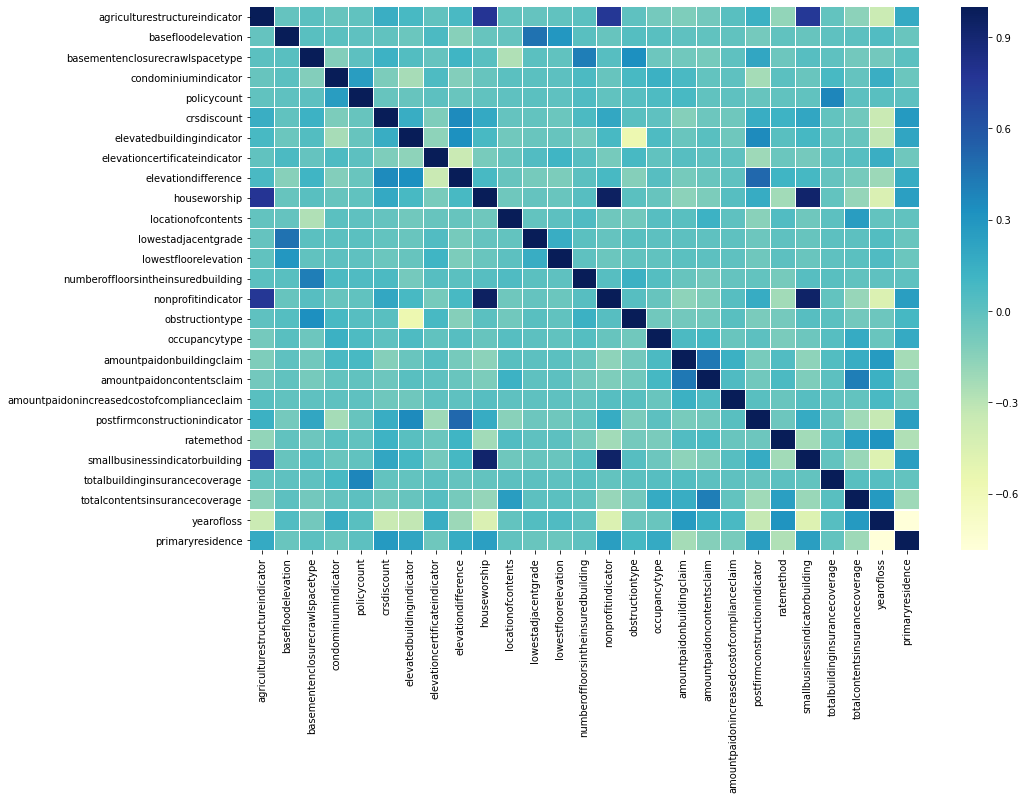

In [68]:
# Create heatmap of correlation matrix
_ = plt.figure(figsize=(15, 10))
_ = sns.heatmap(nona_vars.corr(), linewidths = 0.1, cmap = 'YlGnBu')

Noted correlations between lowestadjacentgrade and basefloodelevation, which makes sense as you increase building grade, the basefloodelevation depth from sea level will increase. Additionally, it makes sense that amount paid on contents vs building claims are also positively correlated.

There are also strong correlations between some of the Y/N indicator variables like nonprofit, smallbusiness, houseofworship. Mant of these variables were mostly NaNs to begin with.

B. Explore relationships between several numerical and categorical variables

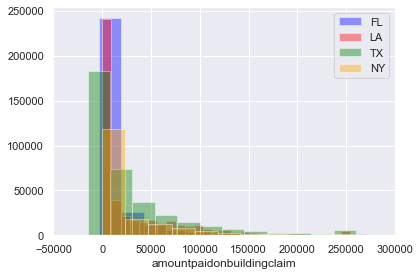

In [59]:
# Distribution of damages among most common states
_ = sns.distplot(claims['amountpaidonbuildingclaim'][claims['state']=='FL'], color='blue', bins=400, kde=False, label='FL')
_ = sns.distplot(claims['amountpaidonbuildingclaim'][claims['state']=='LA'], color='red', bins=400, kde=False, label='LA')
_ = sns.distplot(claims['amountpaidonbuildingclaim'][claims['state']=='TX'], color='green', bins=400, kde=False, label='TX')
_ = sns.distplot(claims['amountpaidonbuildingclaim'][claims['state']=='NY'], color='orange', bins=400, kde=False, label='NY')
_ = plt.xlim(-50000,300000)
_ = plt.legend()
_ = plt.tight_layout()

plt.show()

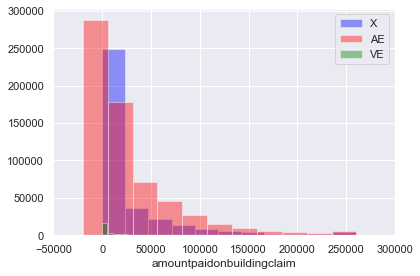

In [61]:
# Distribution of damages among most common floodzones
_ = sns.distplot(claims['amountpaidonbuildingclaim'][claims['floodzone']=='X'], color='blue', bins=400, kde=False, label='X')
_ = sns.distplot(claims['amountpaidonbuildingclaim'][claims['floodzone']=='AE'], color='red', bins=400, kde=False, label='AE')
_ = sns.distplot(claims['amountpaidonbuildingclaim'][claims['floodzone']=='VE'], color='green', bins=400, kde=False, label='VE')
_ = plt.xlim(-50000,300000)
_ = plt.legend()
_ = plt.tight_layout()

plt.show()

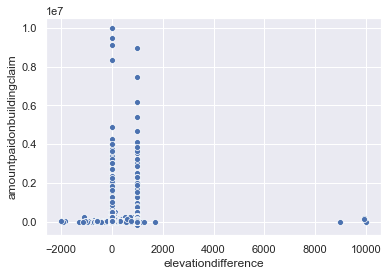

In [62]:
# Relationship between amountpaid and elevation difference
_ = sns.scatterplot(x = 'elevationdifference', y='amountpaidonbuildingclaim', data = claims)

Zoom in to view scatter around zero

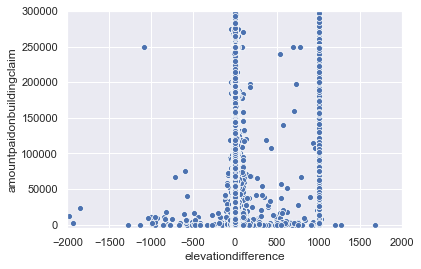

In [68]:
# Zoom in on elevation difference v amount paid on building claim
_ = sns.scatterplot(x = 'elevationdifference', y='amountpaidonbuildingclaim', data = claims)
_ = plt.xlim(-2000, 2000)
_ = plt.ylim(-5000, 300000)
plt.show()

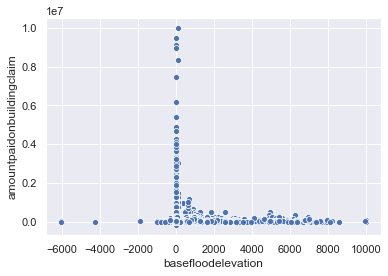

In [69]:
# Relationship between amountpaid and baseflood elevation
_ = sns.scatterplot(x = 'basefloodelevation', y='amountpaidonbuildingclaim', data = claims)

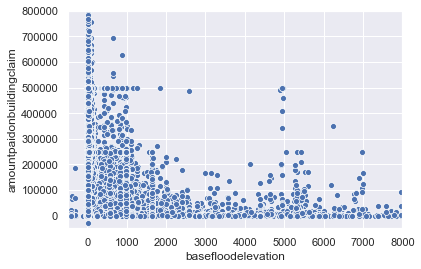

In [72]:
# Zoom in on baseflood elevation v amount paid on building claim
_ = sns.scatterplot(x = 'basefloodelevation', y='amountpaidonbuildingclaim', data = claims)
_ = plt.xlim(-500, 8000)
_ = plt.ylim(-50000, 800000)
plt.show()

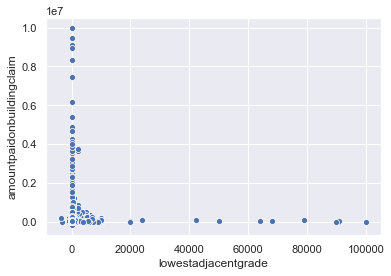

In [73]:
# Scatter of lowest adjacent grade and amount paid on building claim
_ = sns.scatterplot(x = 'lowestadjacentgrade', y='amountpaidonbuildingclaim', data = claims)

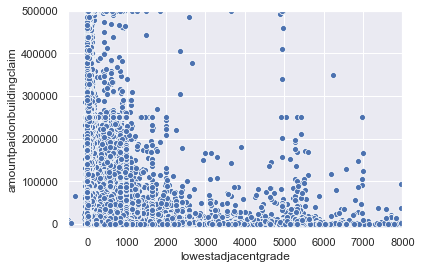

In [78]:
# Zoom in on lowest adjacent grade and amount paid on building claim
_ = sns.scatterplot(x = 'lowestadjacentgrade', y='amountpaidonbuildingclaim', data = claims)
_ = plt.xlim(-500, 8000)
_ = plt.ylim(-10000, 500000)
plt.show()

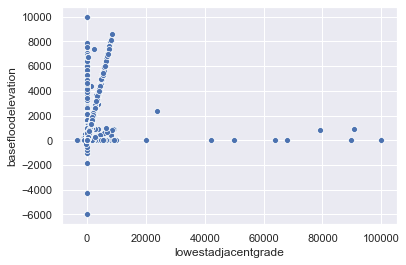

In [79]:
# Scatter of lowest adjacent grade and baseflood elevation
_ = sns.scatterplot(x = 'lowestadjacentgrade', y='basefloodelevation', data = claims)

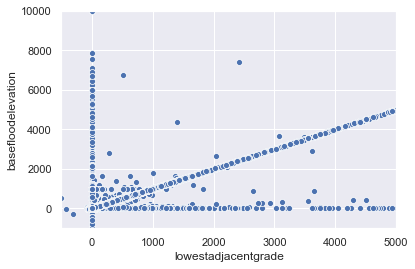

In [82]:
# Zoom in on lowest adjacent grade and baseflood elevation
_ = sns.scatterplot(x = 'lowestadjacentgrade', y='basefloodelevation', data = claims)
_ = plt.xlim(-500, 5000)
_ = plt.ylim(-1000, 10000)
plt.show()

C. Simplify some categorical variables to explore relationship between cat + numerical

In [95]:
# Create simplified floodzone variable

conditions = [
    (claims['floodzone'] == 'AE'),
    (claims['floodzone'] == 'X'),
    (claims['floodzone'] == 'VE'),
    (claims['floodzone'].str[0] == 'A'),
    (claims['floodzone'].str[0] == 'V'),
    (claims['floodzone'].str[0] == 'C'),
]

options = ['AE', 'X', 'VE', 'A', 'V', 'C']

claims['floodzone_simp'] = np.select(conditions, options, default='other')  

In [96]:
claims['floodzone_simp'].value_counts()

A        879937
AE       657107
X        349514
other    286188
C        169933
V         45103
VE        30225
Name: floodzone_simp, dtype: int64

Attempted to plot floodzone by color on several plots, but notebook continued to timeout/freeze before any output was visible, dataframe too large?

In [98]:
# Relationship between amountpaid and elevation difference, colored by floodzone ** can't run in notebook?
_ = sns.scatterplot(x = 'elevationdifference', y='amountpaidonbuildingclaim', data = claims, hue='floodzone_simp')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7ff967698050> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7ff967720dd0> (for post_execute):


KeyboardInterrupt: 

KeyboardInterrupt: 

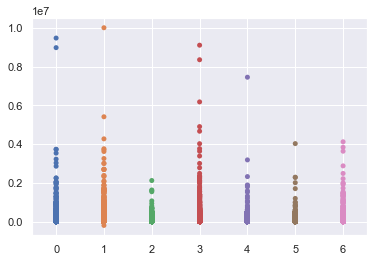

In [102]:
# Distribution of damages among most common states
_ = sns.swarmplot(y='amountpaidonbuildingclaim', x='floodzone_simp', data=claims)

In [131]:
#Attempt to replot histogram of log of amount paid on building claim, colored by floodzone
A = claims['amountpaidonbuildingclaim'][claims['floodzone_simp']== 'A']
AE = claims['amountpaidonbuildingclaim'][claims['floodzone_simp']== 'AE']
X = claims['amountpaidonbuildingclaim'][claims['floodzone_simp']== 'X']
Oth = claims['amountpaidonbuildingclaim'][claims['floodzone_simp']== 'other']
C = claims['amountpaidonbuildingclaim'][claims['floodzone_simp']== 'C']
V = claims['amountpaidonbuildingclaim'][claims['floodzone_simp']== 'V']
VE = claims['amountpaidonbuildingclaim'][claims['floodzone_simp']== 'VE']

In [134]:
A = np.log(A[A>0])
AE = np.log(AE[AE>0])
X = np.log(X[X>0])
Oth = np.log(Oth[Oth>0])
C = np.log(C[C>0])
V = np.log(V[V>0])
VE = np.log(VE[VE>0])

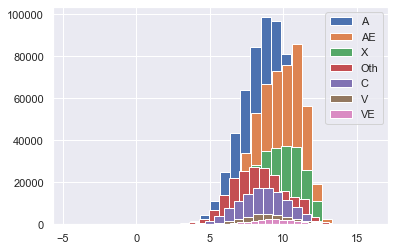

In [139]:
_ = plt.hist(A, label='A', bins=30)
_ = plt.hist(AE, label='AE', bins=30)
_ = plt.hist(X, label='X',bins=30)
_ = plt.hist(Oth, label='Oth', bins=30)
_ = plt.hist(C, label='C', bins=30)
_ = plt.hist(V, label='V', bins=30)
_ = plt.hist(VE, label='VE', bins=30)
_ = plt.legend()
plt.show()

D. Explore relationships between NaN columns?

In [6]:
nan_vars = claims[['basementenclosurecrawlspacetype_NaN', 'condominiumindicator_NaN',
       'crsdiscount_NaN', 'elevationcertificateindicator_NaN',
       'locationofcontents_NaN', 'numberoffloorsintheinsuredbuilding_NaN',
       'obstructiontype_NaN', 'occupancytype_NaN', 'ratemethod_NaN',
       'floodzone_NaN', 'policycount_NaN', 'lowestadjacentgrade_NaN',
       'lowestfloorelevation_NaN', 'amountpaidonbuildingclaim_NaN',
       'amountpaidoncontentsclaim_NaN',
       'amountpaidonincreasedcostofcomplianceclaim_NaN',
       'totalbuildinginsurancecoverage_NaN',
       'totalcontentsinsurancecoverage_NaN', 'elevationdifference_NaN',
       'basefloodelevation_NaN',
       'reportedcity_NaN', 'countycode_NaN', 'censustract_NaN', 'latitude_NaN',
       'longitude_NaN', 'state_NaN', 'reportedzip_NaN']]
nan_vars.corr()

,basementenclosurecrawlspacetype_NaN,condominiumindicator_NaN,crsdiscount_NaN,elevationcertificateindicator_NaN,locationofcontents_NaN,numberoffloorsintheinsuredbuilding_NaN,obstructiontype_NaN,occupancytype_NaN,ratemethod_NaN,floodzone_NaN,...,totalcontentsinsurancecoverage_NaN,elevationdifference_NaN,basefloodelevation_NaN,reportedcity_NaN,countycode_NaN,censustract_NaN,latitude_NaN,longitude_NaN,state_NaN,reportedzip_NaN
basementenclosurecrawlspacetype_NaN,1.000000,0.006835,0.421634,0.002048,0.000865,0.013620,0.002665,0.044377,0.006384,0.001903,...,0.421634,0.421634,-0.000735,0.015373,0.014312,0.004294,0.004586,0.004586,0.344260,0.030943
condominiumindicator_NaN,0.006835,1.000000,0.011591,0.087557,0.195691,0.012127,0.190525,0.056766,0.896545,0.364138,...,0.011591,0.011591,0.054597,0.017764,0.226995,0.104503,0.110034,0.110034,0.014196,0.000727
crsdiscount_NaN,0.421634,0.011591,1.000000,0.001050,0.002374,0.021949,0.002380,0.105394,0.010926,0.006773,...,1.000000,1.000000,0.000906,0.036825,0.034389,0.011514,0.012137,0.012137,0.816496,0.073568
elevationcertificateindicator_NaN,0.002048,0.087557,0.001050,1.000000,-0.012599,0.047853,-0.096891,0.007752,0.094664,0.152340,...,0.001050,0.001050,0.101361,0.008387,0.024477,0.012249,0.014181,0.014181,0.001286,0.000124
locationofcontents_NaN,0.000865,0.195691,0.002374,-0.012599,1.000000,0.107942,0.022823,0.009119,0.169993,0.061260,...,0.002374,0.002374,-0.001567,-0.005815,0.048879,-0.015175,-0.015628,-0.015628,0.002908,-0.005006
numberoffloorsintheinsuredbuilding_NaN,0.013620,0.012127,0.021949,0.047853,0.107942,1.000000,-0.055308,0.003521,0.010089,0.305913,...,0.021949,0.021949,0.035704,-0.001367,0.036294,0.058398,0.041916,0.041916,0.026882,0.002623
obstructiontype_NaN,0.002665,0.190525,0.002380,-0.096891,0.022823,-0.055308,1.000000,0.005891,0.210730,-0.075673,...,0.002380,0.002380,-0.018207,-0.025486,0.036372,-0.064045,-0.066283,-0.066283,0.002915,-0.014985
occupancytype_NaN,0.044377,0.056766,0.105394,0.007752,0.009119,0.003521,0.005891,1.000000,0.053951,0.019669,...,0.105394,0.105394,0.004149,0.007035,0.005904,0.005049,0.005427,0.005427,0.129081,0.011821
ratemethod_NaN,0.006384,0.896545,0.010926,0.094664,0.169993,0.010089,0.210730,0.053951,1.000000,0.337343,...,0.010926,0.010926,0.065205,0.015066,0.212597,0.092550,0.097524,0.097524,0.013382,-0.001240
floodzone_NaN,0.001903,0.364138,0.006773,0.152340,0.061260,0.305913,-0.075673,0.019669,0.337343,1.000000,...,0.006773,0.006773,0.130820,0.039804,0.154968,0.187094,0.189626,0.189626,0.008295,0.004421


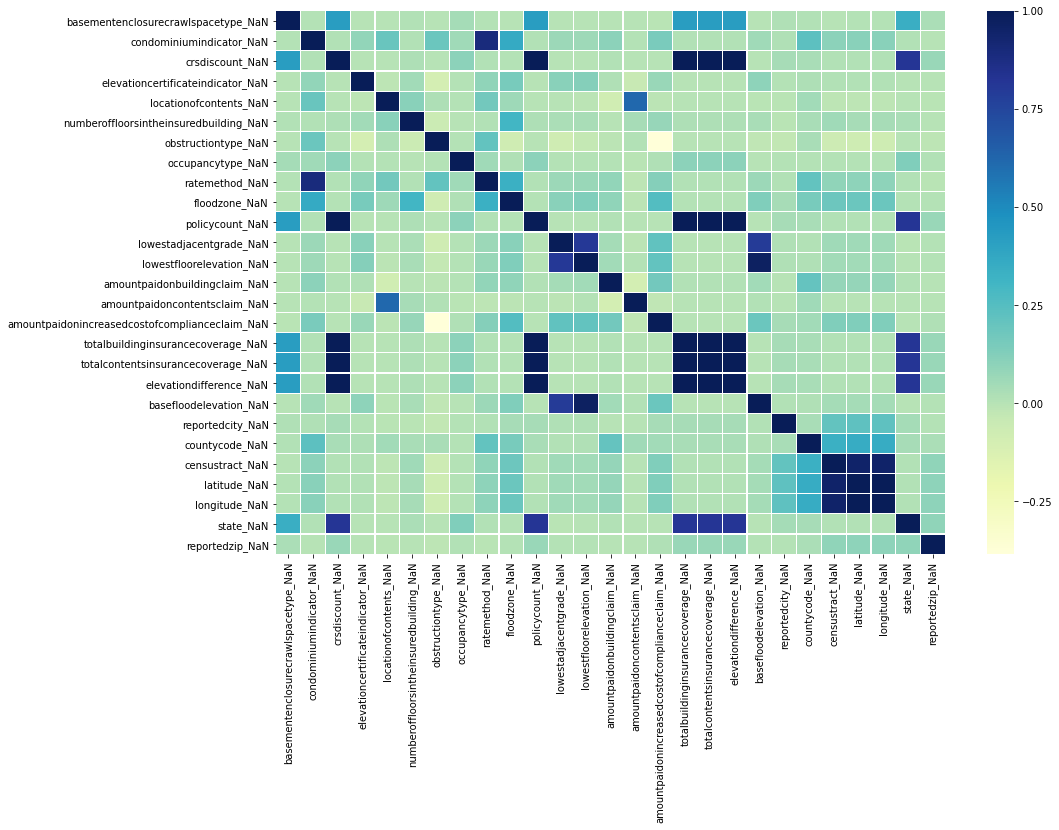

In [7]:
# Create heatmap of correlation matrix
_ = plt.figure(figsize=(15, 10))
_ = sns.heatmap(nan_vars.corr(), linewidths = 0.1, cmap = 'YlGnBu')